# Регрессия - пора творить!

Если вы дошли до этой практики и выполнили все предыдущие - вау! Аплодисменты вам!

<p align="center"><img src="https://s3.wi-fi.ru/cp3o/zqEeEKCkhPUnnwD3dHmuEmQq?response-content-type=image%2Fjpeg" width=500/></p>



Тем не менее, не время расслабляться! На этот раз, мы не будем рассказывать вам новый материал - лишь дадим пару напутствий и пожелаем успехов и сил!

В этот раз вам предлагается разработать модель предсказания цены домов по набору данных Boston Houses Pricing. Мы его уже немного пощупали в прошлой практике, но в этой вам предстоит сделать всё самостоятельно и на полных данных!

Что надо будет сделать:
- Загрузить данные
- Посмотреть и размер, и примеры данных
- Проверить количество пропусков в данных
    - Убедиться, что пропусков в данных нет и можно строить **baseline**
- Делим данные на train и test 
    - Делаем это один раз! Все дальнейшие модификации и улучшения должны делаться на основе единственного разделения!
    - И не забудьте зафиксировать сид! Переменную `RANDOM_SEED` мы даём ниже
- Создаем baseline модель, снимаем метрики на тестовой выборке
- Производим анализ данных, готовим план по очистке и предобработке данных
- Создаем функцию очистки
- Производим очистку train и test выборок -> обучаем модель с очищенными данными
    - Снимаем метрики и так мы оцениваем влияние очистки данных на обучение
- Создаем класс предобработки данных
- Производим предобработку очищенных данных -> обучаем модель
    - Снимаем метрики и так мы оцениваем влияние предобработки данных на обучение

А дальше можете пофантазировать, почитать интернет и посмотреть, как улучшить метрики! 

**Ваша цель - достигнуть наилучших показателей!**

Вот вам пара идей по интересной организации предобработке:
- По признаку `CRIM` создать признак `is_CRIM`, который будет равен 1, если `CRIM` не равен 0 и 0, если `CRIM` равен нулю
- Сделать обучение модели [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html), посмотреть, какие признаки имеют веса близкие к 0 и убрать их из обучения как незначимые
- Оставить только признаки с высокой корреляцией с целевой переменной
- Посмотреть, какие переменные коррелирцют между собой и оставить только единственные из пар коррелирующих
- Посмотреть, в каких примерах данных модель ошибается сильнее всего (отсортировать записи из теста по величине ошибки) и проанализировать, есть ли какая-то зависимость или шум
- Комбинировать разные подходы в зависимости от того, помогает это предсказаниям или нет

Ещё большим плюсом будет, если вы покажете, как влияет каждый этап предобработки на результаты обучения!

In [23]:
# Зафиксируем состояние случайных чисел
import numpy as np
import random
from matplotlib import pyplot as plt
import matplotlib
import pandas as pd
import seaborn as sns
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
random.seed(RANDOM_SEED)

In [24]:
df_src = pd.read_csv('boston.csv')

In [25]:
df_src.shape

(506, 14)

In [26]:
data=df_src.copy()
data_1=data.pop('MEDV')


In [27]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y= train_test_split(data, data_1, test_size=.3, random_state=RANDOM_SEED, shuffle=True)

In [28]:
from sklearn.linear_model import LinearRegression
reg_model = LinearRegression()
reg_model.fit(train_x, train_y)
y_pred = reg_model.predict(test_x)

In [29]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
mae=mean_absolute_error(test_y, y_pred)
mse=mean_squared_error(test_y, y_pred)
r2 = r2_score(test_y, y_pred)
mae,mse,r2



(3.1627098714574267, 21.517444231177375, 0.7112260057484909)

<AxesSubplot:>

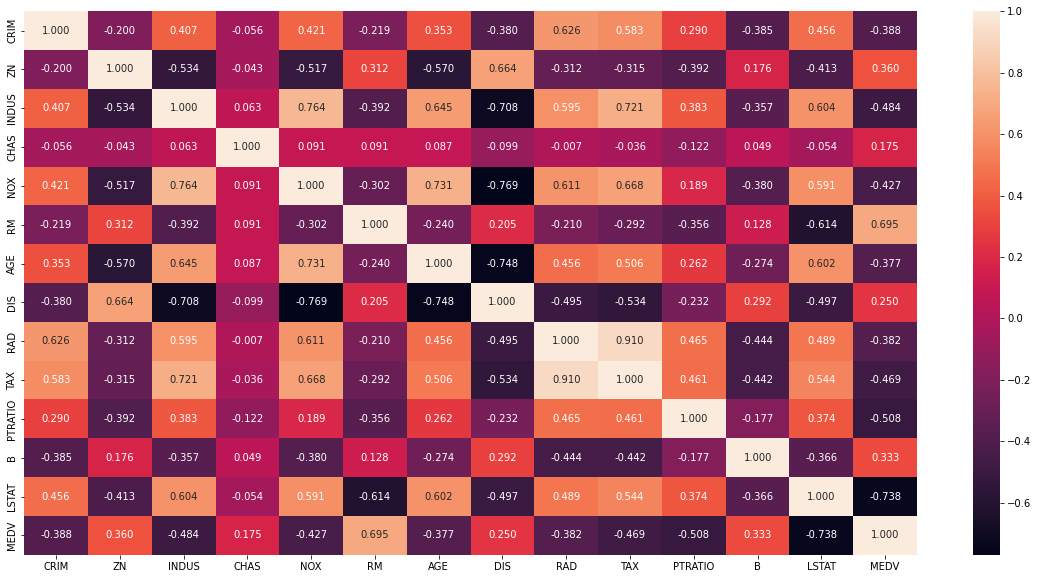

In [30]:
corr_matrix = df_src.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.3f')

In [31]:
data_new = df_src
mask_1 = data_new['MEDV'] == 50
mask_2 = data_new['RM'] < 4
mask_3 = (data_new['RM'] > 8) & (data_new['MEDV'] < 30)
mask_4 = (data_new['INDUS']>14)&(data_new['INDUS']<15.5)
mask_5 = data_new['NOX']>0.8
mask_6 =data_new['RAD']>20 
resultmask = mask_1|mask_2|mask_3|mask_4|mask_5|mask_6


In [32]:
test_x.loc[:,'MEDV']=test_y
train_x.loc[:,'MEDV']=train_y

train_x_1 = (train_x.loc[~resultmask]).copy()
train_y_1 = train_x_1.pop('MEDV')

test_x_1 = (test_x.loc[~resultmask]).copy()
test_y_1 = test_x_1.pop('MEDV')

C:\Users\HP_PC\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [33]:
reg_model = LinearRegression()
reg_model.fit(train_x_1, train_y_1)
y_pred_1 = reg_model.predict(test_x_1)

In [34]:
def metrics(test_y_1, y_pred_1):

    from sklearn.metrics import mean_absolute_error
    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import r2_score
   
    mae=mean_absolute_error(test_y_1, y_pred_1)
    mse=mean_squared_error(test_y_1, y_pred_1)
    r2 = r2_score(test_y_1, y_pred_1)
    dict = {
        'mae_score' : mae,
        'r2_score' : r2,
        'mse_score' : mse
    }
    return dict
metrics(test_y_1,y_pred_1)

{'mae_score': 2.1725856897285496,
 'r2_score': 0.8303997895498618,
 'mse_score': 8.231209457775277}

Обучение модели Lasso

In [35]:
from sklearn import linear_model
mod_Lasso = linear_model.Lasso(alpha=0.0000001, random_state=RANDOM_SEED)
mod_Lasso.fit(train_x_1, train_y_1)
weight=mod_Lasso.coef_
print(mod_Lasso.intercept_)
print(weight)
print(f'Max: {weight.max()}')
print(f'Min: {weight.min()}')


-17.580881579265682
[ 0.75683966  0.01702977  0.02268401  0.10533017 -0.82486257  8.92551828
 -0.07298417 -0.85562653  0.25347209 -0.00948293 -0.51636494  0.01138068
 -0.01055872]
Max: 8.925518277298426
Min: -0.8556265319202913


In [36]:
y_pred_1 = mod_Lasso.predict(test_x_1)
metrics(test_y_1, y_pred_1)

{'mae_score': 2.172585701791056,
 'r2_score': 0.8303997499226017,
 'mse_score': 8.231211381005659}

Метрики не улучшились 

In [37]:
from sklearn.preprocessing import MinMaxScaler
class DataPreprocessing:

    def __init__(self):
        self.scaler=MinMaxScaler()

    def fit(self, data_2):
        DIS_log = np.log(data_2['DIS']) 
        data_2.loc[:,'DIS']=DIS_log
        data_2.loc[:,'LSTAT_poly_2'] = data_2['LSTAT']**2 
        data_2.reset_index(inplace=True)
        data_2.loc[:,'is_CRIM'] = data_2['CRIM'].apply(lambda x: 0 if (x < 0.01) else 1 )
        
        self.mask_0 = (data_2['INDUS']>14)&(data_2['INDUS']<15.5)
        self.mask_4 = (data_2['NOX']>0.8) 
        self.mask_1 = data_2['MEDV'] == 50
        self.mask_2 = data_2['RM'] < 4
        self.mask_3 = (data_2['RM'] > 8) & (data_2['MEDV'] < 30)
        self.scaler=self.scaler.fit(data_2)

    def transform(self, data_2):
        mask_main = self.mask_1|self.mask_3|self.mask_2|self.mask_0|self.mask_4 
        df_1_train = data_2.loc[~mask_main]
        data_change = self.scaler.transform(df_1_train)
        data_change = pd.DataFrame({'CRIM':data_change[:,0],'ZN': data_change[:,1],'INDUS': data_change[:,2],
                                   'CHAS':data_change[:,3], 'NOX': data_change[:,4], 'RM': data_change[:,5], 'AGE': data_change[:,6],
                                   'DIS': data_change[:,7], 'RAD': data_change[:,8], 'TAX': data_change[:,9], 'PTRATIO': data_change[:,10], 
                                   'B': data_change[:,11], 'LSTAT': data_change[:,12], 'MEDV': data_change[:,13], 'LSTAT_poly_2': data_change[:,14],
                                   'is_CRIM': data_change[:,15]})
        return  data_change 

In [38]:
data_set=train_x.copy()
preproc = DataPreprocessing() 
preproc.fit(data_set)  
change_train= preproc.transform(data_set) 
data_set=test_x.copy()
preproc = DataPreprocessing() 
preproc.fit(data_set)  
change_test= preproc.transform(data_set)

In [39]:
train_x1_change = change_train.copy()
train_y1_change = train_x1_change.pop('MEDV')
test_x1_change = change_test.copy()
test_y1_change = test_x1_change.pop('MEDV')
mod_Lasso = linear_model.Lasso(alpha=0.0000001, random_state=RANDOM_SEED)
mod_Lasso.fit(train_x1_change, train_y1_change)
y_pred1_change = mod_Lasso.predict(test_x1_change)

In [40]:
metrics(test_y1_change, y_pred1_change)

{'mae_score': 0.03071699151999243,
 'r2_score': 0.9648378891972829,
 'mse_score': 0.0015428699222082528}

Вывод:


В результате предобработки получен коэффициент = 0.964, следовательно программа имеет способность к высокой предсказательности. 
Изначально данный коэффициент был равен 0,711, после чистки данных стал равен 0,83. Очищение признаков из обучающей выборки не дало результата. 

Что мы ждем от вас? 

Готовый ноутбук с таким же названием, в котором будут обязательные пункты с выводами по анализу данных и анализу поведения модели, а также дополнительные пункты по вашим размышлениям и процессу улучшения модели.

Успехов вам, мы в вас верим и уверены, что вы точно справитесь!

<p align="center"><img src="https://raw.githubusercontent.com/kail4ek/ml_edu/master/assets/cat-computer-peek-out-36960208.jpg" width=600/></p>